<a href="https://colab.research.google.com/github/rushikeshjamdade/COIN_TAB_SOLUTION/blob/main/DIABETES_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIABETES PATIENTS READMISSION ANALYSIS

When a patient who is suffering from Hyperglycemia is admitted to a hospital, he is supposed to be taken good and systematic    care. Mismanagement of Hyperglycemia in the hospital can have an adverse effect on a patient’s health. Many hospitals have lately started following certain protocols with glucose targets in ICU settings but non ICU patients still lack proper management of their blood sugar.

Evidence suggests that inpatient management is not systematic. Their management can lead to readmission of the patient in hospitals after a certain period of time. So if we know beforehand that this particular patient has a high chance of readmission we can change the treatment to avoid readmission.

# GATHERING DATA

In [ ]:
# IMPORTING LIBRARIES  FOR DATA ANALYTICS AND POCESSING
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import re
import pickle
from tqdm import tqdm
import os
from collections import Counter

pd.set_option("display.max_columns",None)

In [ ]:
df = pd.read_csv(r"E:\repository\dataset_diabetes\diabetic_data.csv") # LOADING DATASET

In [ ]:
df.head() #TOP RECORDS FROM DATASET

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
1,15.0,3,59,0,18,0,0,0,9,0
2,25.0,2,11,5,13,2,0,1,6,0
3,35.0,2,44,1,16,0,0,0,7,0
4,45.0,1,51,0,8,0,0,0,5,0
5,55.0,3,31,6,16,0,0,0,9,0


# FEATURE ENGINEERING

###Feature Transformation

Feature transformation is a mathematical transformation in which we apply a mathematical formula to a particular column (feature) and transform the values, which are useful for our further analysis. It is a technique by which we can boost our model performance. It is also known as "Feature Engineering", which creates new features from existing features that may help improve the model performance.

In [ ]:
df.shape # SHAPE OF DATASET

(101766, 50)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# DATA PREPROCESSING

In [ ]:
import numpy as np

df  = df.replace({'?': np.nan})

# Missing Values

Missing Data can occur when no information is provided for one or more items or for a whole unit. Missing Data is a very big problem in a real-life scenarios. In DataFrame sometimes many datasets simply arrive with missing data, either because it exists and was not collected or it never existed.

There are varioud techniques to handle missign values :-

Remove technique
Imputation technique
#####Imputation :-

Univariate Variable
Numerical Feature - Mean/ Median.
Categorical Feature - Mode or "Missing".
Multivariate Variable
KNN Imputation
Iterative (MICE) Imputation

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
dtype: int64

# FEARURE SCALING


Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization.
####Feature Selection

Feature Selection is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data.

In [ ]:
df=df.drop(columns=(['medical_specialty','payer_code','weight','encounter_id','admission_type_id','discharge_disposition_id','admission_source_id']))

In [ ]:
df.race.fillna('Caucasian',inplace=True)


In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [ ]:
df.readmitted.value_counts()

NO     53821
>30    35173
<30    11250
Name: readmitted, dtype: int64

In [ ]:
df.readmitted.replace({'NO':0,'>30':0,'<30':1},inplace=True)

In [ ]:
df=df.rename(columns={'metformin-pioglitazone':'metformin_pioglitazone','glyburide-metformin':'glyburide_metformin','glipizide-metformin':'glipizide_metformin','glimepiride-pioglitazone':'glimepiride_pioglitazone','metformin-rosiglitazone':'metformin_rosiglitazone','glimepiride-pioglitazone':'glimepiride_pioglitazone'})

# EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
def multi_plot(features,df):
    fig, axs = plt.subplots(nrows = 3, ncols=3, figsize = (20,20) )
    index = 0
    for i in range(3):
        for j in range(3):
            sns.countplot(x=features[index], hue="readmitted", data=df, ax=axs[i,j],palette="rocket")
            index += 1
l1 = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide']
l2 = ['miglitol', 'troglitazone','tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide_metformin', 'glipizide_metformin','glimepiride_pioglitazone']
l3 = ['metformin_rosiglitazone','metformin_pioglitazone' , 'pioglitazone', 'rosiglitazone', 'acarbose']

In [ ]:
def plot_med_stat(status):
    l = l1 + l2 + l3
    dic = {}
    explode = []
    for med in l:
        if len(df[df[med]==status]) > 100:
            dic[med] = len(df[df[med]==status])
            explode.append(0.2)
    print(pd.DataFrame.from_dict(dic,orient='index',columns=['total']).sort_values(by=['total']))

    plt.figure(figsize =(10,10))
    plt.pie(dic.values(),labels=dic.keys(),explode = explode, shadow=True, rotatelabels=True,autopct='%1.1f%%')
    plt.legend(title="Medicine names",loc="best",bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.show()

               total
repaglinide      108
rosiglitazone    177
pioglitazone     231
glimepiride      321
glipizide        767
glyburide        809
metformin       1045
insulin        11152


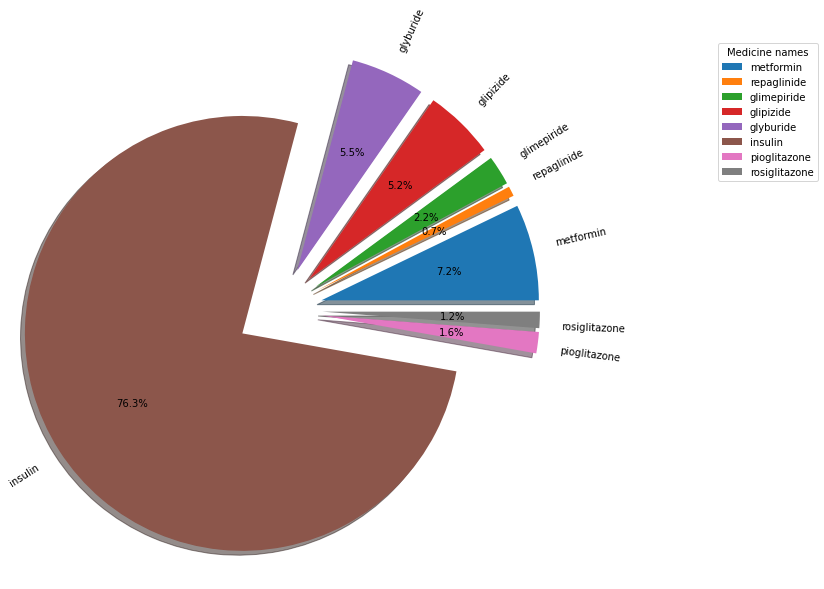

In [ ]:
plot_med_stat('Up')
# PIE CHART USING FOR DATA UNDERSTANDING

This plot only considers medicine with at least 100 cases of upgradation. Clearly, of all the encounters where dosage were increased, Inuslin has the majority of the cases (76.1%), followed by Metformin. There are many medicines whose dosage were not increased, not even in a single case.

              total
pioglitazone    116
glimepiride     192
glyburide       556
glipizide       557
metformin       564
insulin       12020


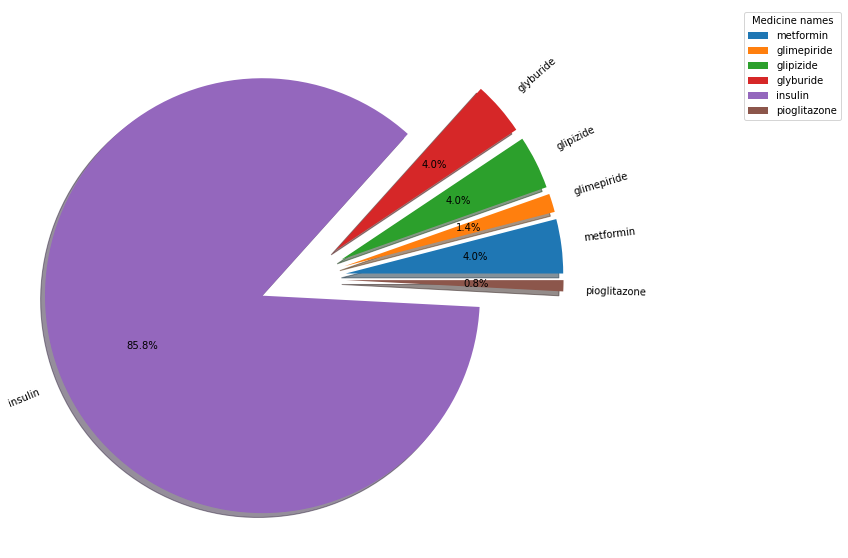

In [ ]:
plot_med_stat('Down')

This plot only considers medicine with at least 100 cases of dosage reduction. Of all the encounters where dosage were reduced, Inuslin has the majority of the cases (85.9%), followed by Metformin, glyburide and then glipizide.

                     total
acarbose               292
nateglinide            663
glyburide_metformin    681
repaglinide           1380
glimepiride           4627
rosiglitazone         6039
pioglitazone          6898
glyburide             9160
glipizide            11238
metformin            18092
insulin              30270


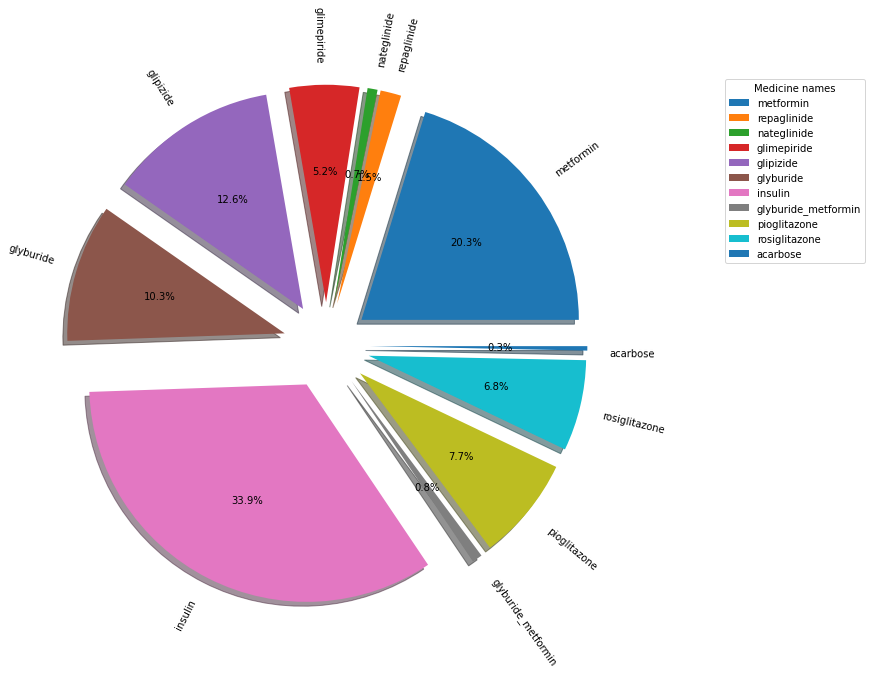

In [ ]:
plot_med_stat('Steady')

Again in cases where medicine was kept steady, insulin (34%) had the majority cases followed by metformin (20.2%), glipizide (12.5%) then glyburide (10.2%)

                           total
insulin                    46802
metformin                  80543
glipizide                  87682
glyburide                  89719
pioglitazone               92999
rosiglitazone              93941
glimepiride                95104
repaglinide                98711
nateglinide                99546
glyburide_metformin        99549
acarbose                   99939
chlorpropamide            100160
miglitol                  100207
tolazamide                100207
tolbutamide               100221
glipizide_metformin       100231
troglitazone              100241
metformin_rosiglitazone   100242
acetohexamide             100243
glimepiride_pioglitazone  100243
metformin_pioglitazone    100243
examide                   100244
citoglipton               100244


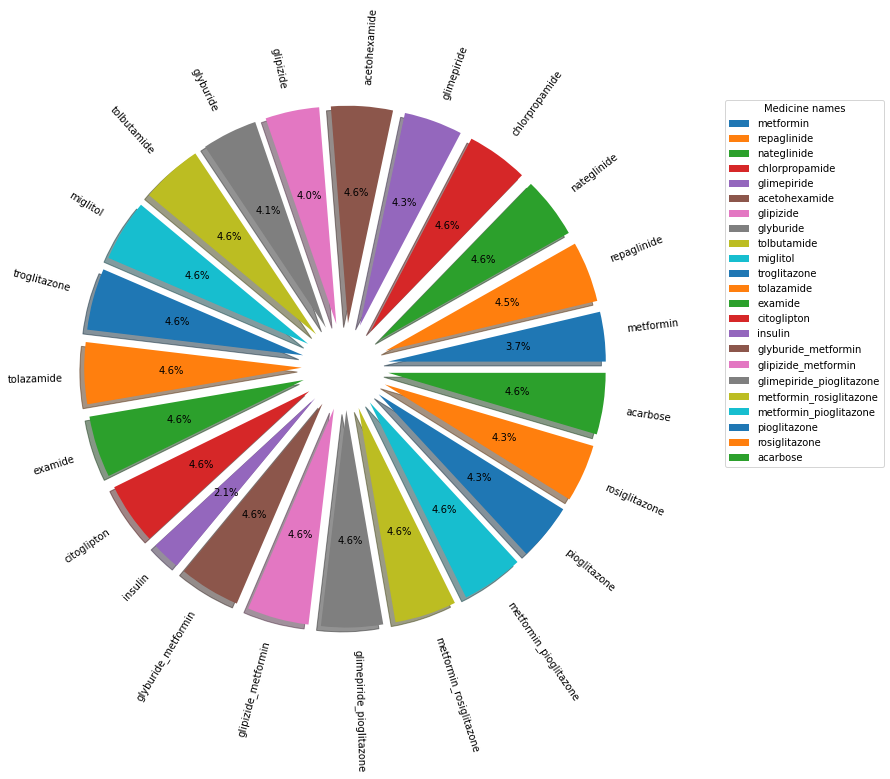

In [ ]:
plot_med_stat('No')

Almost all the medicines faced same number of cases where they were not prescribes except a few. Insulin has the lowest cases where it was not prescribed

By all the analysis of 23 medicine, we can say that Insulin is the most important medicine feature followed by metformin. So we can use Insulin for some kind of feature engineering

# FEATURE SELECTION

- USING CHISQUARE AND F-ONEWAY TEST FOR FEATURE SELECTION.RESULTS GIVE TOP CORRELATED VARIABLES WITH OUTPUT VARIABLE.

- A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to   determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between   the variables you are studying.

In [ ]:

from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

list_pvalue =[]
for i in df:
    tab=pd.crosstab(df[i],df.readmitted)
    pvalue=chi2_contingency(tab)[1]
    list_pvalue.append(pvalue)
    if pvalue <=0.5:
        print("Feature is significant ",i,"Pvalue is less than 0.5 ",pvalue)
    else:
        print("Feature is not significant ",i)

Feature is not significant  patient_nbr
Feature is significant  race Pvalue is less than 0.5  0.1953578551901152
Feature is not significant  gender
Feature is significant  age Pvalue is less than 0.5  9.499935095059321e-16
Feature is significant  time_in_hospital Pvalue is less than 0.5  6.185298552766162e-53
Feature is significant  num_lab_procedures Pvalue is less than 0.5  5.644479718553622e-05
Feature is significant  num_procedures Pvalue is less than 0.5  6.526306149607861e-09
Feature is significant  num_medications Pvalue is less than 0.5  1.3032214222406533e-29
Feature is significant  number_outpatient Pvalue is less than 0.5  1.1228589584757104e-16
Feature is significant  number_emergency Pvalue is less than 0.5  7.902545221083938e-106
Feature is significant  number_inpatient Pvalue is less than 0.5  0.0
Feature is significant  diag_1 Pvalue is less than 0.5  2.52736033833657e-87
Feature is significant  diag_2 Pvalue is less than 0.5  8.442110622802417e-39
Feature is significan

In [ ]:
#age’,’time_in_hospital’, ‘num_lab_procedures’, ‘num_procedures’, ‘num_medications’, ‘number_outpatient’, 
#‘number_emergency’, ‘number_inpatient’, ‘number_diagnoses’

In [ ]:
df1=df.drop(columns=(['patient_nbr', 'gender','nateglinide','acetohexamide', 'troglitazone','tolazamide', 'examide', 'citoglipton','glyburide_metformin', 'glipizide_metformin','glimepiride_pioglitazone', 'metformin_rosiglitazone','metformin_pioglitazone']))

In [ ]:
df1.columns

Index(['race', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
df1.select_dtypes(include='object').columns

Index(['race', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'change',
       'diabetesMed'],
      dtype='object')

In [ ]:
# CONVERTING CATEGORICAL DATA INTO NUMERICAL.PREPARING DATA FOR MODEL BUILDING
df1.metformin.replace({'No':0,"Up":1,"Down":2,"Steady":3},inplace=True)
df1.repaglinide.replace({'No':0,"Up":1,"Down":2,"Steady":3},inplace=True)
df1.chlorpropamide.replace({'No':0,"Up":1,"Down":2,"Steady":3},inplace=True)
df1.glimepiride.replace({'No':0,"Up":1,"Down":2,"Steady":3},inplace=True)
df1.glipizide.replace({'No':0,"Up":1,"Down":2,"Steady":3},inplace=True)
df1.glyburide.replace({'No':0,"Up":1,"Down":2,"Steady":3},inplace=True)
df1.chlorpropamide.replace({'No':0,"Up":1,"Down":2,"Steady":3},inplace=True)
df1.pioglitazone.replace({'No':0,"Up":1,"Down":2,"Steady":3},inplace=True)
df1.rosiglitazone.replace({'No':0,"Up":1,"Down":2,"Steady":3},inplace=True)
df1.acarbose.replace({'No':0,"Up":1,"Down":2,"Steady":3},inplace=True)
df1.miglitol.replace({'No':0,"Up":1,"Down":2,"Steady":3},inplace=True)
df1.insulin.replace({'No':0,"Up":1,"Down":2,"Steady":3},inplace=True)
df1.tolbutamide.replace({'No':0,"Steady":3},inplace=True)
df1.change.replace({'No':0,'Ch':1},inplace=True)
df1.diabetesMed.replace({"Yes":1,"No":0},inplace=True)
df1.max_glu_serum.replace({'None':0,"Norm":1,">200":2,">300":3},inplace=True)
df1.A1Cresult.replace({'None':0,"Norm":1,">7":2,">8":3},inplace=True)


In [ ]:
df1.select_dtypes(include='object').columns

Index(['race', 'age', 'diag_1', 'diag_2', 'diag_3'], dtype='object')

In [ ]:
# TAKING MEAN OF RANGE VALUES OF AGE COLUMNS
def med_range(x):
    x = x.replace('[','')
    x = x.replace(')','')
    l = x.split('-')
    a = (int(l[0]) + int(l[1]))/2
    return a
    
df1['age'] = df1['age'].apply(med_range)

In [ ]:
# CONVERTING ALPHANUMERIC DATA INTO NUMERIC DATA
df1.diag_1 = df1.diag_1.str.replace('V','')
df1.diag_1 = df1.diag_1.str.replace('E','')

df1.diag_2 = df1.diag_2.str.replace('V','')
df1.diag_2 = df1.diag_2.str.replace('E','')

df1.diag_3 = df1.diag_3.str.replace('V','')
df1.diag_3 = df1.diag_3.str.replace('E','')

In [ ]:
# LABEL ENCODER IS USE TO CONVERT CATEGORICAL INTO NUMERICAL DATA
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df1[df1.select_dtypes(include='object').columns]=df1[df1.select_dtypes(include='object').columns].apply(le.fit_transform)

In [ ]:
df1.head()

,race,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,chlorpropamide,glimepiride,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,insulin,change,diabetesMed,readmitted
1,2,15.0,3,59,0,18,0,0,0,146,91,137,9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
2,0,25.0,2,11,5,13,2,0,1,464,90,148,6,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0
3,2,35.0,2,44,1,16,0,0,0,566,109,264,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
4,2,45.0,1,51,0,8,0,0,0,55,31,102,5,0,0,0,0,0,0,3,0,0,0,0,0,0,3,1,1,0
5,2,55.0,3,31,6,16,0,0,0,266,258,102,9,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100244 entries, 1 to 101765
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   race                100244 non-null  int32  
 1   age                 100244 non-null  float64
 2   time_in_hospital    100244 non-null  int64  
 3   num_lab_procedures  100244 non-null  int64  
 4   num_procedures      100244 non-null  int64  
 5   num_medications     100244 non-null  int64  
 6   number_outpatient   100244 non-null  int64  
 7   number_emergency    100244 non-null  int64  
 8   number_inpatient    100244 non-null  int64  
 9   diag_1              100244 non-null  int32  
 10  diag_2              100244 non-null  int32  
 11  diag_3              100244 non-null  int32  
 12  number_diagnoses    100244 non-null  int64  
 13  max_glu_serum       100244 non-null  int64  
 14  A1Cresult           100244 non-null  int64  
 15  metformin           100244 non-nul

In [ ]:
#sns.pairplot(df1,diag_kind='kde')

In [ ]:
#age’,’time_in_hospital’, ‘num_lab_procedures’, ‘num_procedures’, ‘num_medications’, ‘number_outpatient’, 
#‘number_emergency’, ‘number_inpatient’, ‘number_diagnoses’

In [ ]:
df=df1.drop(columns=(['race','max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'insulin', 'change', 'diabetesMed', 'diag_1', 'diag_2', 'diag_3']))

Heatmaps are helpful for large data sets. A heatmap with a time axis can be used to view patterns and changes over time. Heatmap rectangles can be labeled with values of the color variable, which is useful only in cases where there are very few categories on the y-axis.

<AxesSubplot:>

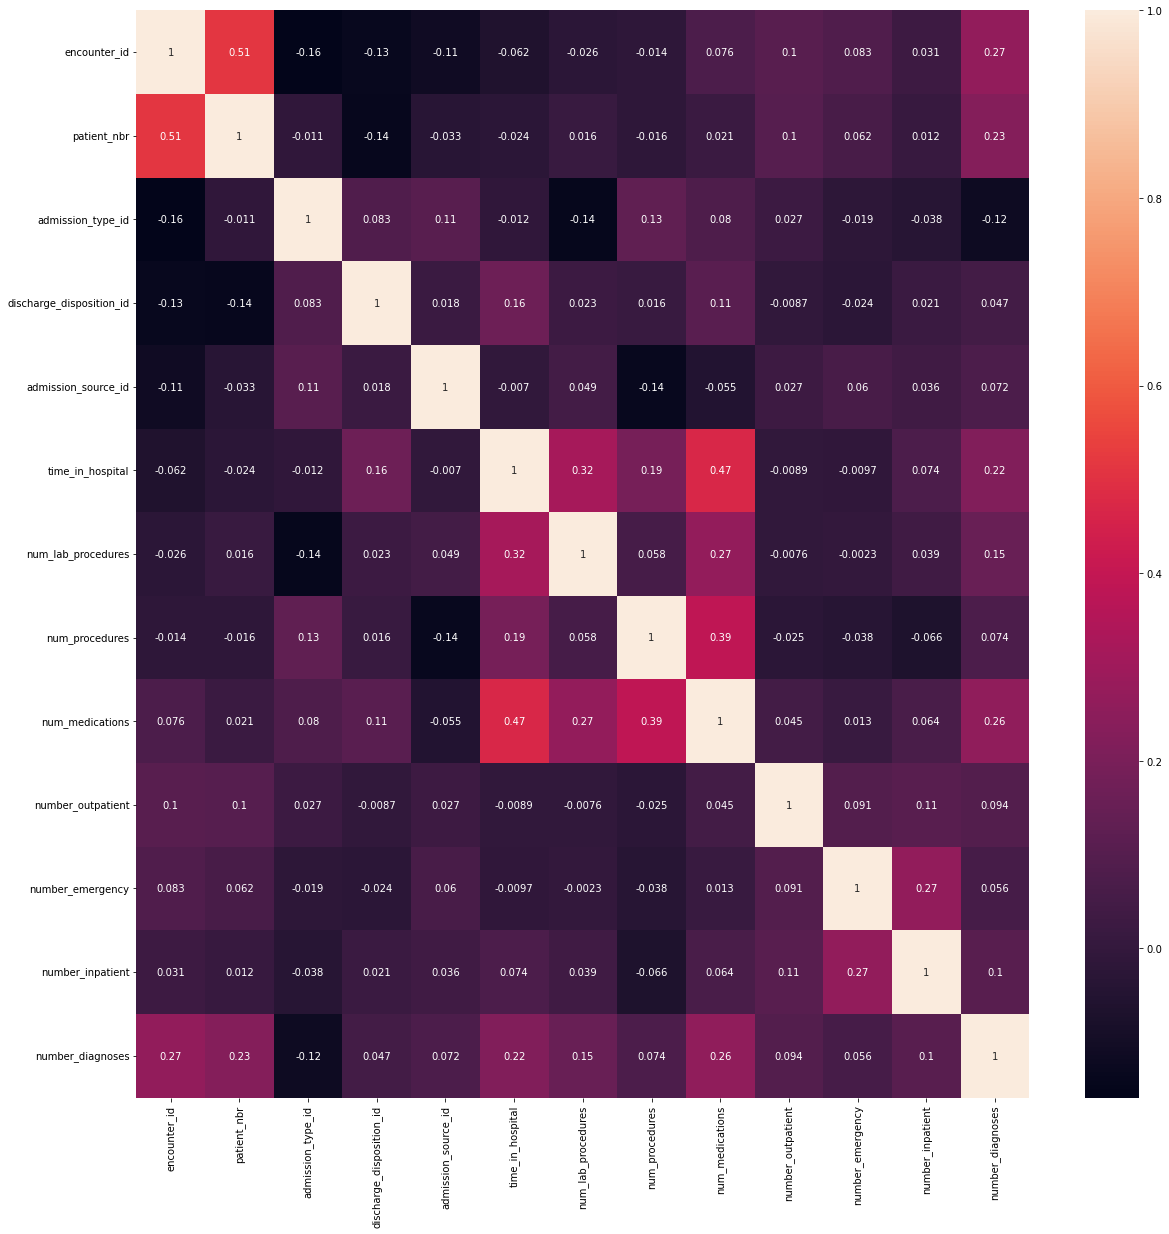

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'readmitted'],
      dtype='object')

In [ ]:
X=df
Y=df['readmitted']

In [ ]:
Y.value_counts()

0    88994
1    11250
Name: readmitted, dtype: int64

In [ ]:
X=X.drop(['readmitted'],axis=1)

# MODEL BUILDING

In [ ]:
# 1 STEP TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [ ]:
from sklearn import preprocessing
from collections import Counter

# SMOTE


Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. The component works by generating new instances from existing minority cases that you supply as input.

In [ ]:
from imblearn.over_sampling import SMOTE
sm= SMOTE() # .9,.5
X_sm,Y_sm = sm.fit_resample(X,Y)
print(sorted(Counter(Y_sm).items()),Y_sm.shape)

[(0, 88994), (1, 88994)] (177988,)


In [ ]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression



logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)


pred  = logreg.predict(X_test)


acc = accuracy_score(Y_test,pred)
p_score=precision_score(Y_test,pred)
r_score=recall_score(Y_test,pred)
f1 = f1_score(Y_test,pred)

print(f'Accuracy: {acc:.3f},Precision: {p_score:3f},Recall: {r_score:3f}, F1 Score: {f1:.3f}')


Accuracy: 0.888,Precision: 0.360656,Recall: 0.009892, F1 Score: 0.019


In [ ]:
from sklearn.linear_model import LogisticRegression



logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_sm, Y_sm)


pred  = logreg.predict(X_test)


acc = accuracy_score(Y_test,pred)
p_score=precision_score(Y_test,pred)
r_score=recall_score(Y_test,pred)
f1 = f1_score(Y_test,pred)

print(f'Accuracy: {acc:.3f},Precision: {p_score:3f},Recall: {r_score:3f}, F1 Score: {f1:.3f}')


Accuracy: 0.541,Precision: 0.132443,Recall: 0.566097, F1 Score: 0.215


In [ ]:
from sklearn.tree import DecisionTreeClassifier


dt=DecisionTreeClassifier()
dt.fit(X_train, Y_train)

pred_model_dt=dt.predict(X_test)

acc = accuracy_score(Y_test,pred_model_dt)
p_score=precision_score(Y_test,pred_model_dt)
r_score=recall_score(Y_test,pred_model_dt)
f1 = f1_score(Y_test,pred_model_dt)

print(f'Accuracy: {acc:.3f},Precision: {p_score:3f},Recall: {r_score:3f}, F1 Score: {f1:.3f}')

Accuracy: 0.789,Precision: 0.138356,Recall: 0.171763, F1 Score: 0.153


In [ ]:
from sklearn.tree import DecisionTreeClassifier


dt=DecisionTreeClassifier(criterion='gini',max_depth=25)
dt.fit(X_sm, Y_sm)

pred_model_dt=dt.predict(X_test)

acc = accuracy_score(Y_test,pred_model_dt)
p_score=precision_score(Y_test,pred_model_dt)
r_score=recall_score(Y_test,pred_model_dt)
f1 = f1_score(Y_test,pred_model_dt)

print(f'Accuracy: {acc:.3f},Precision: {p_score:3f},Recall: {r_score:3f}, F1 Score: {f1:.3f}')

Accuracy: 0.921,Precision: 0.589952,Recall: 0.945144, F1 Score: 0.726


In [ ]:
from sklearn.tree import DecisionTreeClassifier


dt=DecisionTreeClassifier(criterion='gini',max_depth=25)
dt.fit(X_sm, Y_sm)

pred_model_dt=dt.predict(X_train)

acc = accuracy_score(Y_train,pred_model_dt)
p_score=precision_score(Y_train,pred_model_dt)
r_score=recall_score(Y_train,pred_model_dt)
f1 = f1_score(Y_train,pred_model_dt)

print(f'Accuracy: {acc:.3f},Precision: {p_score:3f},Recall: {r_score:3f}, F1 Score: {f1:.3f}')

Accuracy: 0.923,Precision: 0.599384,Recall: 0.948815, F1 Score: 0.735


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(Y_test, pred_model_dt))
print(classification_report(Y_test, pred_model_dt))

[[16364  1461]
 [  122  2102]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     17825
           1       0.59      0.95      0.73      2224

    accuracy                           0.92     20049
   macro avg       0.79      0.93      0.84     20049
weighted avg       0.95      0.92      0.93     20049



In [ ]:
from sklearn.ensemble import RandomForestClassifier


rfc=RandomForestClassifier()
rfc.fit(X_train, Y_train)

pred_model_rfc=rfc.predict(X_test)

acc = accuracy_score(Y_test,pred_model_rfc)
p_score=precision_score(Y_test,pred_model_rfc)
r_score=recall_score(Y_test,pred_model_rfc)
f1 = f1_score(Y_test,pred_model_rfc)

print(f'Accuracy: {acc:.3f},Precision: {p_score:3f},Recall: {r_score:3f}, F1 Score: {f1:.3f}')

Accuracy: 0.883,Precision: 0.192118,Recall: 0.017536, F1 Score: 0.032


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
search_dictRF = {'criterion':['gini','entropy'],
              'max_depth': range(3,30),
              'n_estimators': range(100,300,50)}

In [ ]:
gridRF = GridSearchCV(rfc,param_grid= search_dictRF)

In [ ]:
gridRF.fit(X_sm, Y_sm)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10),
                         'n_estimators': range(100, 300, 50)})

In [ ]:
gridRF.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=250)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rfc=RandomForestClassifier(max_depth=9, n_estimators=250)

rfc.fit(X_sm, Y_sm)

pred_model_rfc=rfc.predict(X_test)

acc = accuracy_score(Y_test,pred_model_rfc)
p_score=precision_score(Y_test,pred_model_rfc)
r_score=recall_score(Y_test,pred_model_rfc)
f1 = f1_score(Y_test,pred_model_rfc)

print(f'Accuracy: {acc:.3f},Precision: {p_score:3f},Recall: {r_score:3f}, F1 Score: {f1:.3f}')

Accuracy: 0.557,Precision: 0.136582,Recall: 0.562050, F1 Score: 0.220


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier


etc=ExtraTreesClassifier()
etc.fit(X_train, Y_train)

pred_model_etc=etc.predict(X_test)

acc = accuracy_score(Y_test,pred_model_etc)
p_score=precision_score(Y_test,pred_model_etc)
r_score=recall_score(Y_test,pred_model_etc)
f1 = f1_score(Y_test,pred_model_etc)

print(f'Accuracy: {acc:.3f},Precision: {p_score:3f},Recall: {r_score:3f}, F1 Score: {f1:.3f}')

Accuracy: 0.872,Precision: 0.146694,Recall: 0.031924, F1 Score: 0.052


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier


etc=ExtraTreesClassifier()
etc.fit(X_sm, Y_sm)

pred_model_etc=etc.predict(X_test)

acc = accuracy_score(Y_test,pred_model_etc)
p_score=precision_score(Y_test,pred_model_etc)
r_score=recall_score(Y_test,pred_model_etc)
f1 = f1_score(Y_test,pred_model_etc)

print(f'Accuracy: {acc:.3f},Precision: {p_score:3f},Recall: {r_score:3f}, F1 Score: {f1:.3f}')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

pred_knn=knn.predict(X_test)

acc = accuracy_score(Y_test,pred_knn)
p_score=precision_score(Y_test,pred_knn)
r_score=recall_score(Y_test,pred_knn)
f1 = f1_score(Y_test,pred_knn)

print(f'Accuracy: {acc:.3f},Precision: {p_score:3f},Recall: {r_score:3f}, F1 Score: {f1:.3f}')

Accuracy: 0.881,Precision: 0.230000,Recall: 0.031025, F1 Score: 0.055


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_sm, Y_sm)

pred_knn=knn.predict(X_test)

acc = accuracy_score(Y_test,pred_knn)
p_score=precision_score(Y_test,pred_knn)
r_score=recall_score(Y_test,pred_knn)
f1 = f1_score(Y_test,pred_knn)

print(f'Accuracy: {acc:.3f},Precision: {p_score:3f},Recall: {r_score:3f}, F1 Score: {f1:.3f}')

Accuracy: 0.820,Precision: 0.377261,Recall: 0.956385, F1 Score: 0.541


In [ ]:
import tabulate as tb

In [ ]:

# Initialize the models
models = {'LogisticRegression': LogisticRegression(),
          'KNNClassifier':KNeighborsClassifier(n_neighbors=5),
          'DecisionTreeClassifier':DecisionTreeClassifier(),
          'RandomForestClassifier':RandomForestClassifier(),
         'ExtraTreesClassifier':ExtraTreesClassifier()
         }

# Initialize an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Model', 'Confusion Matrix', 'Accuracy Score', 'Precision Score', 'Recall Score'])

# Loop through the models
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, Y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the evaluation metrics
    cm = confusion_matrix(Y_test, y_pred)
    acc = accuracy_score(Y_test, y_pred)*100
    prec = precision_score(Y_test, y_pred)*100
    rec = recall_score(Y_test, y_pred)*100

    # Add the results to the dataframe
    results_df = results_df.append({'Model': model_name,
                                    'Confusion Matrix': cm,
                                    'Accuracy Score': acc,
                                    'Precision Score': prec,
                                    'Recall Score': rec}, ignore_index=True)

# Print the results
print(tb.tabulate(results_df.sort_values('Accuracy Score',ascending=False), headers = 'keys', tablefmt = 'fancy_grid'))

E:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Shree\AppData\Local\Temp\ipykernel_4556\1311758227.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name,
C:\Users\Shree\AppData\Local\Temp\ipykernel_4556\1311758227.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': m

╒════╤════════════════════════╤════════════════════╤══════════════════╤═══════════════════╤════════════════╕
│    │ Model                  │ Confusion Matrix   │   Accuracy Score │   Precision Score │   Recall Score │
╞════╪════════════════════════╪════════════════════╪══════════════════╪═══════════════════╪════════════════╡
│  0 │ LogisticRegression     │ [[17786    39]     │          88.8274 │           37.0968 │        1.03417 │
│    │                        │  [ 2201    23]]    │                  │                   │                │
├────┼────────────────────────┼────────────────────┼──────────────────┼───────────────────┼────────────────┤
│  3 │ RandomForestClassifier │ [[17663   162]     │          88.3186 │           21.3592 │        1.97842 │
│    │                        │  [ 2180    44]]    │                  │                   │                │
├────┼────────────────────────┼────────────────────┼──────────────────┼───────────────────┼────────────────┤
│  1 │ KNNClassifie

C:\Users\Shree\AppData\Local\Temp\ipykernel_4556\1311758227.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name,


In [ ]:
# Initialize the models
models = {'LogisticRegression': LogisticRegression(),
          'KNNClassifier':KNeighborsClassifier(n_neighbors=5),
          'DecisionTreeClassifier':DecisionTreeClassifier(criterion='gini',max_depth=25),
          'RandomForestClassifier':RandomForestClassifier(),
         'ExtraTreesClassifier':ExtraTreesClassifier()
         }

# Initialize an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Model', 'Confusion Matrix', 'Accuracy Score', 'Precision Score', 'Recall Score'])

# Loop through the models
for model_name, model in models.items():
    # Fit the model
    model.fit(X_sm, Y_sm)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the evaluation metrics
    cm = confusion_matrix(Y_test, y_pred)
    acc = accuracy_score(Y_test, y_pred)*100
    prec = precision_score(Y_test, y_pred)*100
    rec = recall_score(Y_test, y_pred)*100

    # Add the results to the dataframe
    results_df = results_df.append({'Model': model_name,
                                    'Confusion Matrix': cm,
                                    'Accuracy Score': acc,
                                    'Precision Score': prec,
                                    'Recall Score': rec}, ignore_index=True)

# Print the results
print(tb.tabulate(results_df.sort_values('Accuracy Score',ascending=False), headers = 'keys', tablefmt = 'fancy_grid'))

E:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Shree\AppData\Local\Temp\ipykernel_4556\337925300.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name,
C:\Users\Shree\AppData\Local\Temp\ipykernel_4556\337925300.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': mod

╒════╤════════════════════════╤════════════════════╤══════════════════╤═══════════════════╤════════════════╕
│    │ Model                  │ Confusion Matrix   │   Accuracy Score │   Precision Score │   Recall Score │
╞════╪════════════════════════╪════════════════════╪══════════════════╪═══════════════════╪════════════════╡
│  4 │ ExtraTreesClassifier   │ [[17612   213]     │          98.8029 │           91.1618 │        98.786  │
│    │                        │  [   27  2197]]    │                  │                   │                │
├────┼────────────────────────┼────────────────────┼──────────────────┼───────────────────┼────────────────┤
│  3 │ RandomForestClassifier │ [[17531   294]     │          98.4638 │           88.2588 │        99.3705 │
│    │                        │  [   14  2210]]    │                  │                   │                │
├────┼────────────────────────┼────────────────────┼──────────────────┼───────────────────┼────────────────┤
│  2 │ DecisionTree

C:\Users\Shree\AppData\Local\Temp\ipykernel_4556\337925300.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name,
